# 모델링 2차

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [2]:
total = pd.read_csv("./total19_23.csv")

In [3]:
total = total.drop(columns=["Unnamed: 0"]).reset_index()
total

,index,기준_년분기_코드,행정동_코드,월_평균_소득_금액,음식_지출_총금액,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,총_직장_인구_수,총_상주인구_수,총_유동인구_수
0,0,20231,11650652,3222382,3342744000,287,318,2,5,3,8,31,25472897119,614306,43401,23406,5970984
1,1,20231,11680690,3550527,714958000,88,97,2,2,2,2,9,10267281635,294118,8809,18031,3459896
2,2,20231,11680656,6567504,2347576000,106,120,3,3,7,8,14,10835924940,262248,192577,24138,3945565
3,3,20231,11710641,3568357,874812000,92,99,4,4,12,12,7,5909898978,162844,34975,21688,4485287
4,4,20231,11710610,2779980,1700014000,156,171,3,5,4,6,15,10310320177,315015,7762,33572,6582284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8325,8325,20224,11710641,3568357,991783000,98,107,5,5,3,3,9,5531540936,162568,34975,21688,4516217
8326,8326,20224,11710646,3263464,672383000,71,79,1,1,6,5,8,6833204517,128230,6769,32060,8082167
8327,8327,20224,11710647,4202887,1097191000,54,72,11,8,8,6,18,514218665,19790,1268,17776,3467145
8328,8328,20224,11740600,2473111,664156000,101,108,6,6,7,8,7,3645345014,101112,2450,28380,10067211


In [4]:
total_numeric=total.select_dtypes(include=['int64', 'float64'])
correlations  = total_numeric.corr()['당월_매출_금액']
sorted_features = correlations.abs().sort_values(ascending=False)
sorted_features

당월_매출_금액      1.000000
당월_매출_건수      0.960966
음식_지출_총금액     0.905220
유사_업종_점포_수    0.883401
점포_수          0.883046
프랜차이즈_점포_수    0.776078
폐업_점포_수       0.760029
개업_점포_수       0.696218
총_직장_인구_수     0.654164
총_유동인구_수      0.442984
기준_년분기_코드     0.145928
월_평균_소득_금액    0.132723
행정동_코드        0.093004
총_상주인구_수      0.080859
index         0.032433
개업_율          0.018368
폐업_률          0.016282
Name: 당월_매출_금액, dtype: float64

In [5]:
total.columns

Index(['index', '기준_년분기_코드', '행정동_코드', '월_평균_소득_금액', '음식_지출_총금액', '점포_수',
       '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수',
       '당월_매출_금액', '당월_매출_건수', '총_직장_인구_수', '총_상주인구_수', '총_유동인구_수'],
      dtype='object')

In [6]:
#다중공선성 제거

#다중공선성

from statsmodels.stats.outliers_influence import variance_inflation_factor
#영향을 주는 이상치 모듈에서 분산팽창요인 가져오기

vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(total.values,i)for i in range(total.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (total.shape[1])

vif["features"] = total.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,1.040340,index
1,0.002067,기준_년분기_코드
2,1.210359,행정동_코드
3,1.651288,월_평균_소득_금액
4,7.725231,음식_지출_총금액
5,inf,점포_수
6,inf,유사_업종_점포_수
7,2.082735,개업_율
8,7.361217,개업_점포_수
9,1.963707,폐업_률


# Regression

In [7]:
total3 = pd.read_csv("./total3.csv")

In [8]:
total3

,Unnamed: 0,기준년분기코드,행정동코드,월평균소득금액,음식지출총금액,유사업종점포수,개업점포수,폐업점포수,당월매출금액,총직장인구수,총상주인구수,총유동인구수
0,0,20231,11650652,3222382,3342744000,318,5,8,25472897119,43401,23406,5970984
1,1,20231,11680690,3550527,714958000,97,2,2,10267281635,8809,18031,3459896
2,2,20231,11680656,6567504,2347576000,120,3,8,10835924940,192577,24138,3945565
3,3,20231,11710641,3568357,874812000,99,4,12,5909898978,34975,21688,4485287
4,4,20231,11710610,2779980,1700014000,171,5,6,10310320177,7762,33572,6582284
...,...,...,...,...,...,...,...,...,...,...,...,...
8325,8325,20224,11710641,3568357,991783000,107,5,3,5531540936,34975,21688,4516217
8326,8326,20224,11710646,3263464,672383000,79,1,5,6833204517,6769,32060,8082167
8327,8327,20224,11710647,4202887,1097191000,72,8,6,514218665,1268,17776,3467145
8328,8328,20224,11740600,2473111,664156000,108,6,8,3645345014,2450,28380,10067211


In [9]:
#독립변수, 종속변수 정의
x_zscore = pd.read_csv("./x1_zscore.csv")
y = total3[['당월매출금액']]

In [10]:
total3 = total3.drop(columns=["Unnamed: 0"])

In [11]:
x_zscore = x_zscore.drop(columns = ['Unnamed: 0'])

In [12]:
scaler = StandardScaler()
y_zscore= scaler.fit_transform(y)

In [13]:
y

,당월매출금액
0,25472897119
1,10267281635
2,10835924940
3,5909898978
4,10310320177
...,...
8325,5531540936
8326,6833204517
8327,514218665
8328,3645345014


다중공선성은 제거됨.

In [14]:
# 회귀 모델 생성
model = sm.OLS(y_zscore, x_zscore).fit()

# 회귀 결과 출력
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              7234.
Date:                Mon, 27 May 2024   Prob (F-statistic):                        0.00
Time:                        14:45:18   Log-Likelihood:                         -3182.9
No. Observations:                8330   AIC:                                      6382.
Df Residuals:                    8322   BIC:                                      6438.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Mean Squared Error (MSE): 0.1355465249233795
Root Mean Squared Error (RMSE): 0.3681664364433286
Mean Absolute Error (MAE): 0.20051103449663651
R-squared (R2): 0.8665599111767995


c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


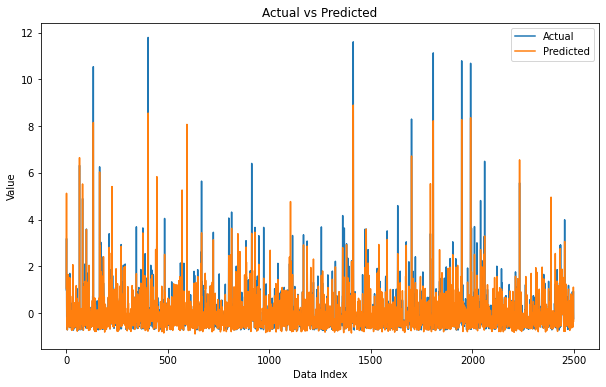

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 훈련 세트와 테스트 세트로 데이터 나누기
x_train, x_test, y1_train, y1_test = train_test_split(x_zscore, y_zscore, test_size=0.3, random_state=42)

# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(x_train, y1_train)

# 테스트 데이터에 대한 예측 수행
y1_pred = model.predict(x_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y1_test, y1_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y1_test, y1_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y1_test, y1_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y1_test, label='Actual')
plt.plot(y1_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()


In [32]:
print(model.summary())

AttributeError: 'Ridge' object has no attribute 'summary'

In [ ]:
#선형다중회귀(model) 예측값 저장하기
#1 모델저장
model = LinearRegression()

# RMSLE
Root Mean Squared Logarithmic Error

실제 매출액보다 더 크게 예측을 하면 발생할 피해(손실)이 더 악영향을 준다고 생각. 

즉, 매출액을 실제보다 더 적게 예측하는 건 괜찮을 수 있지만, 더 크게 예측하는 것을 방지하고자 RMSE보다 RMSLE를 사용

In [16]:
total3[['당월매출금액']]

,당월매출금액
0,25472897119
1,10267281635
2,10835924940
3,5909898978
4,10310320177
...,...
8325,5531540936
8326,6833204517
8327,514218665
8328,3645345014


array([[<Axes: title={'center': '당월매출금액'}>]], dtype=object)

c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing fr

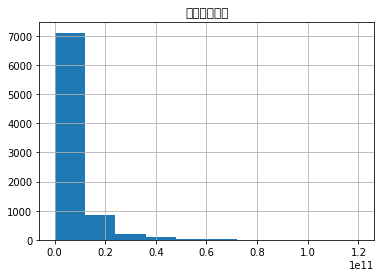

In [17]:
#매출액 분포 확인
total3[['당월매출금액']].hist()

왜곡된 값을 정규 분포 형태로 바꾸는 가장 일반적인 방법이 로그를 적용해서 변환

In [18]:
#RMLSE함수 정의
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y-log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3f}, MAE: {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr_reg = LinearRegression()
lr_reg.fit(x_train, y1_train)
pred = lr_reg.predict(x_test)
evaluate_regr(y1_test, pred)


RMSLE: 0.240, RMSE: 0.368, MAE: 0.201


In [20]:
# 실제 값과 예측 값 비교
def get_top_error_data(y1_test, pred, n_tops=5):
    # y_test를 numpy 배열로 변환
    result_df = pd.DataFrame(y1_test, columns=['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])

    print(result_df.sort_values('diff', ascending=False)[:n_tops])

In [21]:
get_top_error_data(y1_test, pred, n_tops=5)

      real_count  predicted_count      diff
2060    6.492593              3.0  3.492593
913     6.402565              3.0  3.402565
1807   11.128459              8.0  3.128459
1947   10.789198              8.0  2.789198
403    11.788764              9.0  2.788764


array([[<Axes: title={'center': '당월매출금액'}>]], dtype=object)

c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\jeong\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing fr

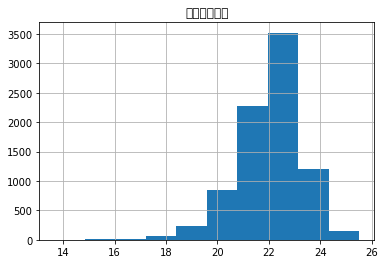

In [22]:
y_log = np.log1p(y)
y_log.hist()

In [23]:
y_log

,당월매출금액
0,23.960881
1,23.052228
2,23.106133
3,22.499895
4,23.056411
...,...
8325,22.433732
8326,22.645060
8327,20.058159
8328,22.016717


In [24]:
#log데이터로 학습
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 훈련 세트와 테스트 세트로 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(x_zscore, y_log, test_size=0.3, random_state=42)

In [25]:
lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)

evaluate_regr(y_test, pred)

RMSLE: 0.037, RMSE: 0.825, MAE: 0.578


In [26]:
def get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=False):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)

In [27]:
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)

In [28]:

for model in [lr_reg, ridge_reg]:
    get_model_predict(model, x_train, x_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.825, RMSE: 325943980564.398, MAE: 23479516557.167
### Ridge ###
RMSLE: 0.825, RMSE: 322841894937.463, MAE: 23290896979.877


In [29]:
pip install scikit-learn


[notice] A new release of pip available: 22.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
